# Check dataset shapes
Compute histogram of image dimensions across training and validation sets to decide upon the optimal patch size for 3D training

In [1]:
import os
import sys
import tempfile
from glob import glob
import logging

import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt

from ipynb.fs.full.io_utils import create_data_list

In [2]:
# list folders to search for the data
data_root = ["/mnt/data/mranzini/Desktop/GIFT-Surg/Data/NeuroImage_dataset/GroupA", 
             "/mnt/data/mranzini/Desktop/GIFT-Surg/Data/NeuroImage_dataset/GroupB1",
             "/mnt/data/mranzini/Desktop/GIFT-Surg/Data/NeuroImage_dataset/GroupB2", 
             "/mnt/data/mranzini/Desktop/GIFT-Surg/Data/NeuroImage_dataset_extension/GroupC",
             "/mnt/data/mranzini/Desktop/GIFT-Surg/Data/NeuroImage_dataset_extension/GroupD",
             "/mnt/data/mranzini/Desktop/GIFT-Surg/Data/NeuroImage_dataset_extension/GroupE",
             "/mnt/data/mranzini/Desktop/GIFT-Surg/Data/NeuroImage_dataset_extension/GroupF"]

# list of subject IDs to search for data
list_root = "/mnt/data/mranzini/Desktop/GIFT-Surg/Retraining_with_expanded_dataset/config/file_names"
data_list = [os.path.join(list_root, "list_train_files.txt"), 
             os.path.join(list_root, "list_validation_h_files.txt"),
             os.path.join(list_root, "list_validation_p_files.txt")]

# 
train_files = create_data_list(data_folder_list=data_root, 
                               subject_list=data_list, 
                               img_postfix='_Image', 
                               label_postfix='_Label')

print(len(train_files))

366


In [3]:
dim_x, dim_y, dim_z = [], [], []
for t in train_files:
    filename = t['img']
    img_nii = nib.load(filename)
    img_shape = img_nii.shape
    dim_x.append(img_shape[0])
    dim_y.append(img_shape[1])
    dim_z.append(img_shape[2])
    

In [4]:
print(len(dim_x), len(dim_y), len(dim_z))

366 366 366


Text(0.5, 1.0, 'Z direction')

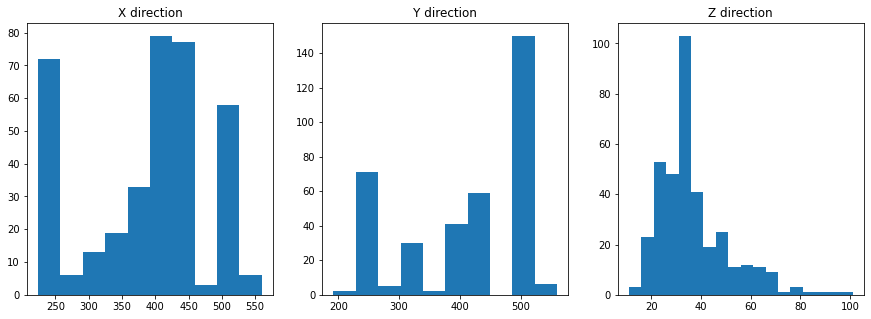

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(dim_x)
plt.title("X direction")
plt.subplot(132)
plt.hist(dim_y)
plt.title("Y direction")
plt.subplot(133)
binwidth = 5
plt.hist(dim_z, bins=range(min(dim_z), max(dim_z) + binwidth, binwidth))
plt.title("Z direction")

In [26]:
cases_below_36 = np.sum(np.array(dim_z) < 30)
print(cases_below_36)

95
